# ASTRAL TREE

In [1]:
import pandas as pd
import numpy as np

In [2]:
!which python
!python --version

/home/thibauld/.pyenv/versions/3.10.14/bin/python
Python 3.10.14


In [3]:
import pyranges as pr

In [4]:
#!pip install pyranges

In [5]:
#!pip install matplotlib

# Intersection HyPhy and GERP results

## Filter the purifying selection sites

In [6]:
# Uploading the output of the Hyphy pipeline.
hyphy=pd.read_csv("/home/thibauld/Documents/Bioinformatics/Hyphy/csv_extracted_MEME/all_loci.csv")
# Rename column "sample" to "locus"
hyphy = hyphy.rename(columns={"sample": "Chromosome"})
hyphy

,Chromosome,codon,omega,alpha,beta-,p-,beta+,p+,LRT,p-value,q-value,branches_with_selection,LogL,AICc
0,ACmerged_contig_10026,1,1.936422,1.607794,0.261719,1.000000,3.113367,0.000000,0.000000,0.666667,0.897103,0,-22.893057,-22.893057
1,ACmerged_contig_10026,2,NaN,0.000000,0.000000,0.970693,52.397485,0.029307,2.771286,0.120517,0.897103,2,-19.598363,-18.723861
2,ACmerged_contig_10026,3,1.931410,1.574562,0.000000,1.000000,3.041125,0.000000,0.000000,0.666667,0.897103,0,-10.932309,-10.932309
3,ACmerged_contig_10026,4,49.600610,1.026870,0.000000,0.957254,50.933388,0.042746,2.553630,0.135285,0.897103,3,-33.347903,-32.079230
4,ACmerged_contig_10026,5,NaN,0.000000,0.000000,0.010000,0.216730,0.990000,0.012228,0.638016,0.897103,1,-10.382246,-10.381963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652686,Becon104Scf14253g0001.1,181,6409.749064,0.517884,0.444104,0.993281,3319.507251,0.006719,7.700837,0.009455,0.249886,2,-34.827106,-31.221895
652687,Becon104Scf14253g0001.1,182,NaN,0.000000,0.000000,0.988131,54.851172,0.011869,9.320394,0.004150,0.153558,1,-17.688916,-13.392790
652688,Becon104Scf14253g0001.1,183,46.104276,0.409888,0.159098,0.948421,18.897610,0.051579,4.647345,0.045232,0.836793,0,-34.260829,-32.016694
652689,Becon104Scf14253g0001.1,184,1.847486,0.898054,0.377918,1.000000,1.659142,0.000000,0.000000,0.666667,0.844749,0,-18.409945,-18.409945


In [7]:
# How many chro in the file?
hyphy['Chromosome'].nunique()

1237

In [8]:
# Make two columns for positions related to codon number.

# Add a nucleotide position for the codon
position_start = (hyphy['codon'] - 1) * 3 + 1 
position_end   = (hyphy['codon'] - 1) * 3 + 3 

# Add columns
hyphy['Start'] = position_start
hyphy['End'] = position_end

hyphy

,Chromosome,codon,omega,alpha,beta-,p-,beta+,p+,LRT,p-value,q-value,branches_with_selection,LogL,AICc,Start,End
0,ACmerged_contig_10026,1,1.936422,1.607794,0.261719,1.000000,3.113367,0.000000,0.000000,0.666667,0.897103,0,-22.893057,-22.893057,1,3
1,ACmerged_contig_10026,2,NaN,0.000000,0.000000,0.970693,52.397485,0.029307,2.771286,0.120517,0.897103,2,-19.598363,-18.723861,4,6
2,ACmerged_contig_10026,3,1.931410,1.574562,0.000000,1.000000,3.041125,0.000000,0.000000,0.666667,0.897103,0,-10.932309,-10.932309,7,9
3,ACmerged_contig_10026,4,49.600610,1.026870,0.000000,0.957254,50.933388,0.042746,2.553630,0.135285,0.897103,3,-33.347903,-32.079230,10,12
4,ACmerged_contig_10026,5,NaN,0.000000,0.000000,0.010000,0.216730,0.990000,0.012228,0.638016,0.897103,1,-10.382246,-10.381963,13,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652686,Becon104Scf14253g0001.1,181,6409.749064,0.517884,0.444104,0.993281,3319.507251,0.006719,7.700837,0.009455,0.249886,2,-34.827106,-31.221895,541,543
652687,Becon104Scf14253g0001.1,182,NaN,0.000000,0.000000,0.988131,54.851172,0.011869,9.320394,0.004150,0.153558,1,-17.688916,-13.392790,544,546
652688,Becon104Scf14253g0001.1,183,46.104276,0.409888,0.159098,0.948421,18.897610,0.051579,4.647345,0.045232,0.836793,0,-34.260829,-32.016694,547,549
652689,Becon104Scf14253g0001.1,184,1.847486,0.898054,0.377918,1.000000,1.659142,0.000000,0.000000,0.666667,0.844749,0,-18.409945,-18.409945,550,552


In [9]:
# Make the filter to retain only the purifying selection sites.

# Convert 'omega' column to numeric (force non-numeric to NaN)
hyphy['omega'] = pd.to_numeric(hyphy['omega'], errors='coerce')

# Convert 'p+' column to numeric as well
hyphy['p+'] = pd.to_numeric(hyphy['p+'], errors='coerce')

# Put in place filters on four values.
hyphy_filtered = hyphy[
    (hyphy['beta+'] == 0) &
    (hyphy['p-value'] == 1.0) &
    (hyphy['branches_with_selection'] == 0) &
    (pd.isna(hyphy['omega']))
]

hyphy_filtered

,Chromosome,codon,omega,alpha,beta-,p-,beta+,p+,LRT,p-value,q-value,branches_with_selection,LogL,AICc,Start,End
14,ACmerged_contig_10026,15,NaN,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0,0.0,0.0,43,45
18,ACmerged_contig_10026,19,NaN,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0,0.0,0.0,55,57
19,ACmerged_contig_10026,20,NaN,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0,0.0,0.0,58,60
28,ACmerged_contig_10026,29,NaN,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0,0.0,0.0,85,87
29,ACmerged_contig_10026,30,NaN,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0,0.0,0.0,88,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652670,Becon104Scf14253g0001.1,165,NaN,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0,0.0,0.0,493,495
652671,Becon104Scf14253g0001.1,166,NaN,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0,0.0,0.0,496,498
652672,Becon104Scf14253g0001.1,167,NaN,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0,0.0,0.0,499,501
652678,Becon104Scf14253g0001.1,173,NaN,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0,0.0,0.0,517,519


In [10]:
# Here the results are given by codon, let's convert it in range of nucleotids.

import pyranges as pr

# Create a Pyranges object from your DataFrame
gr = pr.PyRanges(hyphy_filtered[["Chromosome", "Start", "End"]])

# Merge adjacent intervals (slack=1 tells PyRanges to merge intervals if there's ≤1 bp gap between them.)
merged = gr.merge(slack=1)

# Convert back to DataFrame and rename columns
merged_df = merged.as_df()



In [11]:
# Input the correct dataframe name:

hyphy_range=merged_df

hyphy_range

,Chromosome,Start,End
0,ACmerged_contig_16,31,33
1,ACmerged_contig_16,43,45
2,ACmerged_contig_16,70,75
3,ACmerged_contig_16,100,111
4,ACmerged_contig_16,115,117
...,...,...,...
82588,Becon104Scf14253g0001.1,475,477
82589,Becon104Scf14253g0001.1,487,489
82590,Becon104Scf14253g0001.1,493,501
82591,Becon104Scf14253g0001.1,517,519


## Filter the GERP conserved sites

In [12]:
# Uploading the output of the Hyphy pipeline.

column_names=["chrom", "region", "pos_start", "pos_end", "RS-score","p-value", "not_length", "alpha", "beta" ]
# Read the file
gerp = pd.read_csv(
    "/home/thibauld/Documents/Bioinformatics/Deleterious_alleles_pipeline/Deleterious_alleles_PNG/GERP/GERP_PNG_ASTRAL/all.mfa.rates.elems",
    sep='\t',
    header=None,
    names=column_names
)
gerp

,chrom,region,pos_start,pos_end,RS-score,p-value,not_length,alpha,beta
0,ACmerged_contig_10026,region,1844,3767,5809.130,1.054190e-36,1923,0.0,0.0
1,ACmerged_contig_10026,region,494,982,1479.330,4.556360e-11,2411,0.0,0.0
2,ACmerged_contig_1002,region,23,489,1355.180,4.229020e-54,466,0.0,0.0
3,ACmerged_contig_10030,region,108,1787,4566.370,4.479080e-50,1679,0.0,0.0
4,ACmerged_contig_10035,region,16,848,1883.650,5.663600e-28,832,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1915,Becon104Scf07591g0002.1,region,233,819,1933.740,9.425270e-88,586,0.0,0.0
1916,Becon104Scf07961g0002.1,region,414,644,557.142,5.582040e-11,230,0.0,0.0
1917,Becon104Scf09217g0008.1,region,80,1110,2898.010,5.417900e-134,1030,0.0,0.0
1918,Becon104Scf09794g0002.1,region,48,469,1021.730,1.816390e-32,421,0.0,0.0


In [13]:
summary = gerp[["RS-score", "p-value"]].agg(["min", "max", "mean"])
print(summary)

         RS-score   p-value
min     14.520000  0.000000
max   6581.510000  0.000194
mean  1636.677218  0.000002


Looking at these RS scores — values like 2269, 2029, etc. — they represent the total RS score summed across all bases in the region.
These are not per-base RS scores, but summed RS scores over the element length.
If a 1000 bp region has ~2.2 RS score per base, you'll get ~2200 as the total.

The raw RS scores in this file (from the *.elems output of GERP++) are summed across the entire region, 
so longer regions naturally have higher RS scores, even if they're not more constrained per base. 
This makes direct comparison across regions of different sizes misleading.


Solution: Use RS Score per base (mean RS score)

To compare constrained regions fairly regardless of their length, compute the average RS score per base for each element:
Mean RS score per base=Total RS scoreLength of region (end - start + 1)
Mean RS score per base=Length of region (end - start + 1)Total RS score​

In [14]:
# Calculate region length
gerp["length"] = gerp["pos_end"] - gerp["pos_start"] + 1

# Calculate mean RS score per base (called filtration by RS density).
gerp["mean_RS_score"] = gerp["RS-score"] / gerp["length"]

In [15]:
gerp

,chrom,region,pos_start,pos_end,RS-score,p-value,not_length,alpha,beta,length,mean_RS_score
0,ACmerged_contig_10026,region,1844,3767,5809.130,1.054190e-36,1923,0.0,0.0,1924,3.019298
1,ACmerged_contig_10026,region,494,982,1479.330,4.556360e-11,2411,0.0,0.0,489,3.025215
2,ACmerged_contig_1002,region,23,489,1355.180,4.229020e-54,466,0.0,0.0,467,2.901884
3,ACmerged_contig_10030,region,108,1787,4566.370,4.479080e-50,1679,0.0,0.0,1680,2.718077
4,ACmerged_contig_10035,region,16,848,1883.650,5.663600e-28,832,0.0,0.0,833,2.261285
...,...,...,...,...,...,...,...,...,...,...,...
1915,Becon104Scf07591g0002.1,region,233,819,1933.740,9.425270e-88,586,0.0,0.0,587,3.294276
1916,Becon104Scf07961g0002.1,region,414,644,557.142,5.582040e-11,230,0.0,0.0,231,2.411870
1917,Becon104Scf09217g0008.1,region,80,1110,2898.010,5.417900e-134,1030,0.0,0.0,1031,2.810873
1918,Becon104Scf09794g0002.1,region,48,469,1021.730,1.816390e-32,421,0.0,0.0,422,2.421161


In [16]:
summary = gerp[["mean_RS_score", "length", "p-value"]].agg(["min", "max", "mean"])
print(summary)

      mean_RS_score  length   p-value
min        0.676402     5.0  0.000000
max        4.516667  2001.0  0.000194
mean       2.773885   611.6  0.000002


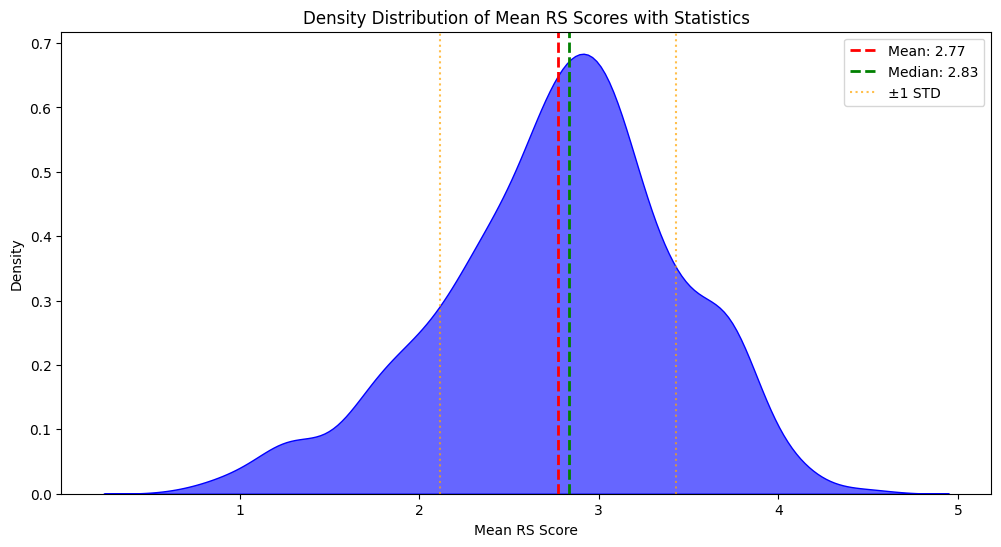

Statistics for mean_RS_score:
Mean: 2.7739
Median: 2.8321
Standard Deviation: 0.6555
Min: 0.6764
Max: 4.5167
95th percentile: 3.7751


In [17]:
import numpy as np
import matplotlib.pyplot as plt  # You need this import!
import seaborn as sns





plt.figure(figsize=(12, 6))

# Create the density plot
ax = sns.kdeplot(gerp['mean_RS_score'], fill=True, color='blue', alpha=0.6)

# Add vertical lines for key statistics
mean_val = gerp['mean_RS_score'].mean()
median_val = gerp['mean_RS_score'].median()
std_val = gerp['mean_RS_score'].std()

plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
plt.axvline(mean_val + std_val, color='orange', linestyle=':', alpha=0.7, label=f'±1 STD')
plt.axvline(mean_val - std_val, color='orange', linestyle=':', alpha=0.7)

plt.title('Density Distribution of Mean RS Scores with Statistics')
plt.xlabel('Mean RS Score')
plt.ylabel('Density')
plt.legend()
plt.show()

# Print key statistics
print(f"Statistics for mean_RS_score:")
print(f"Mean: {mean_val:.4f}")
print(f"Median: {median_val:.4f}")
print(f"Standard Deviation: {std_val:.4f}")
print(f"Min: {gerp['mean_RS_score'].min():.4f}")
print(f"Max: {gerp['mean_RS_score'].max():.4f}")
print(f"95th percentile: {gerp['mean_RS_score'].quantile(0.95):.4f}")

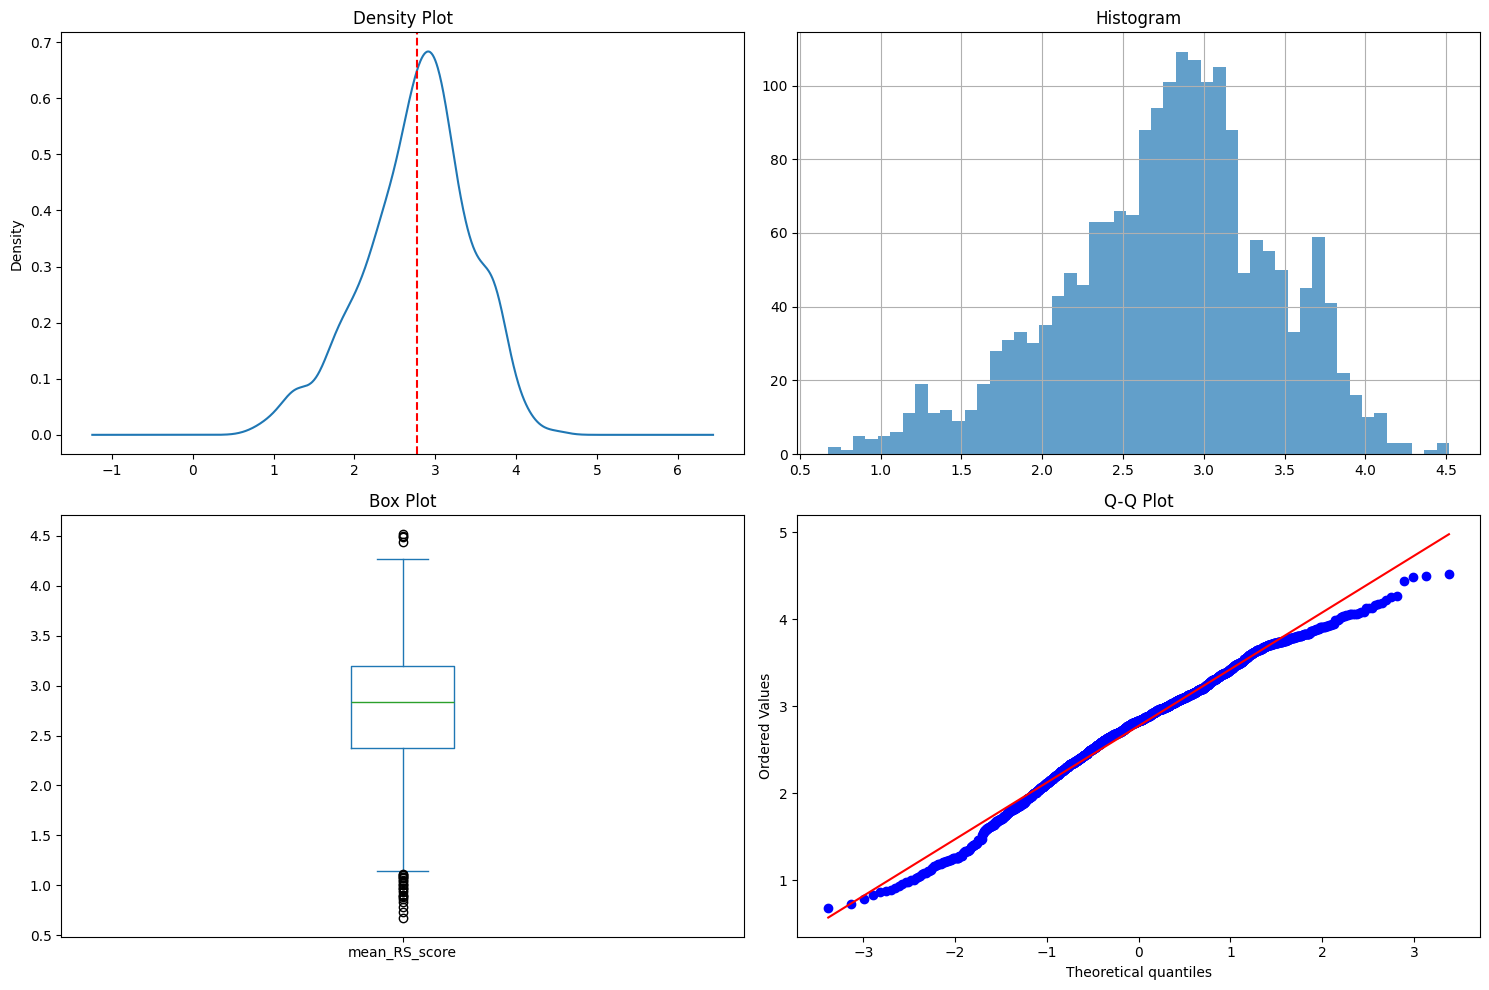

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Density plot
gerp['mean_RS_score'].plot(kind='density', ax=axes[0,0], title='Density Plot')
axes[0,0].axvline(gerp['mean_RS_score'].mean(), color='red', linestyle='--')

# 2. Histogram
gerp['mean_RS_score'].hist(bins=50, ax=axes[0,1], alpha=0.7)
axes[0,1].set_title('Histogram')

# 3. Box plot
gerp['mean_RS_score'].plot(kind='box', ax=axes[1,0])
axes[1,0].set_title('Box Plot')

# 4. QQ plot (for normality check)
from scipy import stats
stats.probplot(gerp['mean_RS_score'], dist="norm", plot=axes[1,1])
axes[1,1].set_title('Q-Q Plot')

plt.tight_layout()
plt.show()

In [19]:
# We select the regions with strong constrains (conserved exon) with RS score > 5.
gerp_filtered = gerp[gerp["mean_RS_score"] >= 3.7]


In [20]:
len(gerp_filtered)

154

In [21]:
# For PyRange
# Rename columns for merging:
gerp_range=gerp_filtered[["chrom", "pos_start", "pos_end"]].rename(
    columns={"chrom":"Chromosome", "pos_start": "Start", "pos_end": "End"}
)
gerp_range

,Chromosome,Start,End
6,ACmerged_contig_10054,535,559
13,ACmerged_contig_1011,90,95
41,ACmerged_contig_10412,697,746
43,ACmerged_contig_10412,688,696
55,ACmerged_contig_10500,462,467
...,...,...,...
1819,ACmerged_contig_9547,1080,1088
1839,ACmerged_contig_9838,1207,1230
1847,ACmerged_contig_9906,534,543
1850,ACmerged_contig_9951,687,695


## Include Chomosomes size

In [22]:
# First we import the length of the chromosomes, calculated from the fasta file
import pandas as pd

# Adjust the path if needed
csv_path = "/home/thibauld/Documents/Bioinformatics/Deleterious_alleles_pipeline/Deleterious_alleles_github/baits_sequences/baits_coordinates.csv"

# Read the CSV
baits = pd.read_csv(csv_path)

# Clean baits Chromosome name to match hyphy and gerp
baits_clean = baits.copy()
baits_clean["Chromosome"] = baits_clean["Chromosome"].str.replace("Hannah_Begonia_baits-", "", regex=False)

# Display the first few rows
baits_clean.head()


,Chromosome,Start,End
0,ACmerged_contig_1002,1,811
1,ACmerged_contig_10026,1,4034
2,ACmerged_contig_10030,1,1862
3,ACmerged_contig_10035,1,1386
4,ACmerged_contig_10054,1,2073


In [23]:
# Rename for merging

baits_range=baits_clean
baits_range

,Chromosome,Start,End
0,ACmerged_contig_1002,1,811
1,ACmerged_contig_10026,1,4034
2,ACmerged_contig_10030,1,1862
3,ACmerged_contig_10035,1,1386
4,ACmerged_contig_10054,1,2073
...,...,...,...
1234,Becon104Scf02747g0032.1,1,1347
1235,Becon104Scf00004g0014.1,1,219
1236,Becon104Scf01446g0053.1,1,1605
1237,Becon104Scf03109g0024.1,1,874


## Make the intersection

### Using PyRanges

### Prepare GERP and hyphy for intersection

## Intersection

In [24]:
# Prepare the dataframes for PyRange use:
baits_rg=baits_range.sort_values(["Chromosome", "Start", "End"]).reset_index(drop=True)
gerp_rg=gerp_range.sort_values(["Chromosome", "Start", "End"]).reset_index(drop=True)
hyphy_rg=hyphy_range.sort_values(["Chromosome", "Start", "End"]).reset_index(drop=True)

In [25]:
gerp_rg["Length"] = gerp_rg["End"] - gerp_rg["Start"]
gerp_rg

,Chromosome,Start,End,Length
0,ACmerged_contig_10054,535,559,24
1,ACmerged_contig_1011,90,95,5
2,ACmerged_contig_10412,688,696,8
3,ACmerged_contig_10412,697,746,49
4,ACmerged_contig_10500,462,467,5
...,...,...,...,...
149,ACmerged_contig_9547,1647,1652,5
150,ACmerged_contig_9838,1207,1230,23
151,ACmerged_contig_9906,534,543,9
152,ACmerged_contig_9951,687,695,8


In [26]:
# Convert in PyRanges objects
baits_pr = pr.PyRanges(baits_range)
gerp_pr = pr.PyRanges(gerp_range)
hyphy_pr = pr.PyRanges(hyphy_range)

In [27]:
import pyranges as pr

# Assuming you have three PyRanges objects: baits_pr, gerp_pr, hyphy_pr

# Intersect gr1 and gr2
#intermediate = baits_pr.intersect(gerp_pr)

# Intersect the result with gr3 to get the triple-overlap
#triple_overlap = intermediate.intersect(hyhy_pr)
#overlap_pr = triple_overlap

overlap_pr = baits_pr.intersect(gerp_pr).intersect(hyphy_pr) 

overlap_pr

,Chromosome,Start,End
0,ACmerged_contig_66,358,363
1,ACmerged_contig_66,367,369
2,ACmerged_contig_66,373,375
3,ACmerged_contig_694,175,183
4,ACmerged_contig_806,907,909
...,...,...,...
265,ACmerged_contig_31289,1063,1067
266,ACmerged_contig_33065,694,699
267,ACmerged_contig_33084,145,150
268,ACmerged_contig_38449,571,573


In [28]:
# Save as BED
overlap_pr.to_bed("intersection_GERP_HyPhy.bed")

# Save as CSV (via Pandas)
overlap_pr.df.to_csv("intersection_GERP_HyPhy.csv", index=False)

# Plotting

In [29]:
import pandas as pd

# Convert PyRanges to DataFrames
baits_df = baits_pr.df
gerp_df = gerp_pr.df
hyphy_df = hyphy_pr.df
overlap_df = overlap_pr.df

# Add a 'Type' column to each DataFrame
baits_df['Type'] = 'Bait'
gerp_df['Type'] = 'GERP'
hyphy_df['Type'] = 'HyPhy'
overlap_df['Type'] = 'Overlap'

# Combine all DataFrames (use the DataFrame versions, not PyRanges)
all_data = pd.concat([baits_df, gerp_df, hyphy_df, overlap_df])

# Verify
all_data.head()

,Chromosome,Start,End,Type
0,ACmerged_contig_16,1,1824,Bait
1,ACmerged_contig_20,1,1465,Bait
2,ACmerged_contig_52,1,1040,Bait
3,ACmerged_contig_66,1,2875,Bait
4,ACmerged_contig_86,1,3211,Bait


In [30]:
# Subset all_data to try plotting
# Plot only chr1 and chr2
subset_data = all_data[all_data['Chromosome'].isin(['ACmerged_contig_31289','ACmerged_contig_24516','ACmerged_contig_16', 'ACmerged_contig_20', 'ACmerged_contig_797', 'ACmerged_contig_806', 'ACmerged_contig_1011', 'ACmerged_contig_1065'])]


In [31]:
# 1. filter chromosomes based on relevant data

# Get chromosomes that have at least one GERP, HyPhy, or Overlap region
relevant_chroms = all_data[
    all_data['Type'].isin(['GERP', 'HyPhy', 'Overlap'])
]['Chromosome'].unique()

# Filter common_chroms to keep only relevant ones
common_chroms = sorted(relevant_chroms)

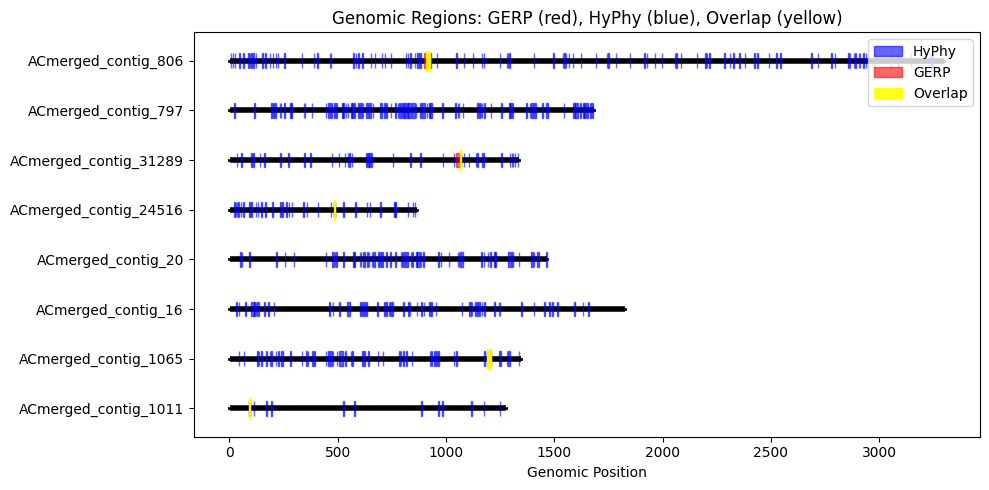

In [32]:
# 2. Plot script

import matplotlib.pyplot as plt
import matplotlib.patches as patches

# --- Step 1: Filter chromosomes ---
relevant_chroms = subset_data[
    subset_data['Type'].isin(['GERP', 'HyPhy', 'Overlap'])
]['Chromosome'].unique()
common_chroms = sorted(relevant_chroms)

# --- Step 2: Initialize plot ---
fig, ax = plt.subplots(figsize=(10, len(common_chroms) * 0.5 + 1))  # Adjust height dynamically

# --- Step 3: Plot each chromosome ---
for i, chrom in enumerate(common_chroms):
    # Get chromosome length (from Bait regions if available, otherwise max position)
    chrom_bait = subset_data[(subset_data['Chromosome'] == chrom) & (subset_data['Type'] == 'Bait')]
    if not chrom_bait.empty:
        chrom_length = chrom_bait['End'].max()
    else:
        chrom_length = subset_data[subset_data['Chromosome'] == chrom]['End'].max()
    
    y = i  # y-position for current chromosome

    # Draw chromosome baseline (black line)
    ax.plot([0, chrom_length], [y, y], color='black', lw=2, zorder=1)

    # Draw BAIT regions (thick black line, if they exist)
    bait_regions = subset_data[(subset_data['Chromosome'] == chrom) & (subset_data['Type'] == 'Bait')]
    for _, row in bait_regions.iterrows():
        ax.plot([row['Start'], row['End']], [y, y], color='black', lw=4, solid_capstyle='butt', zorder=2)

    # Draw HyPhy regions (blue)
    hyphy_regions = subset_data[(subset_data['Chromosome'] == chrom) & (subset_data['Type'] == 'HyPhy')]
    for _, row in hyphy_regions.iterrows():
        ax.add_patch(patches.Rectangle(
            (row['Start'], y - 0.15),
            row['End'] - row['Start'],
            0.3,
            color='blue',
            alpha=0.6,
            zorder=3,
            label='HyPhy' if (i == 0 and _ == hyphy_regions.index[0]) else None
        ))

    # Draw GERP regions (red)
    gerp_regions = subset_data[(subset_data['Chromosome'] == chrom) & (subset_data['Type'] == 'GERP')]
    for _, row in gerp_regions.iterrows():
        ax.add_patch(patches.Rectangle(
            (row['Start'], y - 0.15),
            row['End'] - row['Start'],
            0.3,
            color='red',
            alpha=0.6,
            zorder=4,
            label='GERP' if (i == 0 and _ == gerp_regions.index[0]) else None
        ))

    # Draw OVERLAP regions (yellow, on top)
    overlap_regions = subset_data[(subset_data['Chromosome'] == chrom) & (subset_data['Type'] == 'Overlap')]
    for _, row in overlap_regions.iterrows():
        ax.add_patch(patches.Rectangle(
            (row['Start'], y - 0.2),
            row['End'] - row['Start'],
            0.4,
            color='yellow',
            alpha=0.9,
            zorder=5,
            label='Overlap' if (i == 0 and _ == overlap_regions.index[0]) else None
        ))

# --- Step 4: Format plot ---
ax.set_yticks(range(len(common_chroms)))
ax.set_yticklabels(common_chroms)
ax.set_xlabel("Genomic Position")
ax.set_title("Genomic Regions: GERP (red), HyPhy (blue), Overlap (yellow)")

# Legend without duplicates
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc='upper right')

plt.tight_layout()
plt.savefig("Genomic_Regions_subset.png", dpi=300, bbox_inches='tight')
plt.show()


# Display only chromosomes with overlap

In [33]:
over_data=all_data[all_data["Type"]=="Overlap"]
list_chr=over_data["Chromosome"].unique()
int_subset_data = all_data[all_data['Chromosome'].isin(list_chr)]
int_subset_data

,Chromosome,Start,End,Type
3,ACmerged_contig_66,1,2875,Bait
23,ACmerged_contig_694,1,1637,Bait
27,ACmerged_contig_806,1,3300,Bait
40,ACmerged_contig_1011,1,1277,Bait
44,ACmerged_contig_1065,1,1344,Bait
...,...,...,...,...
265,ACmerged_contig_31289,1063,1067,Overlap
266,ACmerged_contig_33065,694,699,Overlap
267,ACmerged_contig_33084,145,150,Overlap
268,ACmerged_contig_38449,571,573,Overlap


In [34]:
# Number of chromosomes with intersection?
int_subset_data["Chromosome"].nunique()

82

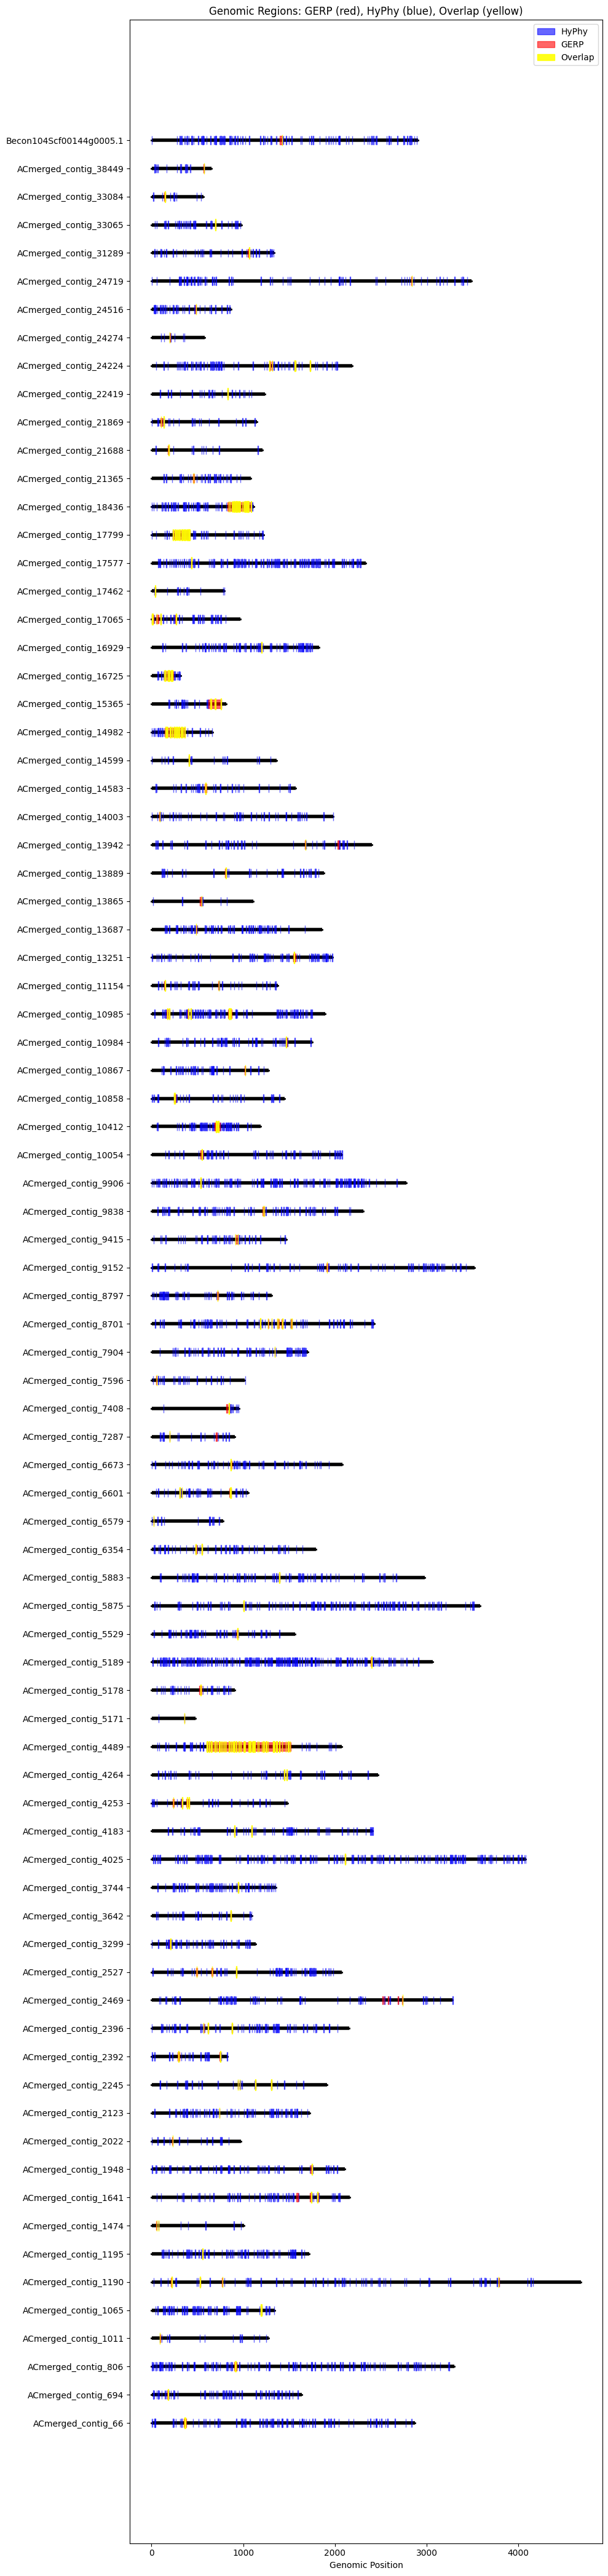

In [35]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# --- Step 1: Filter chromosomes ---
relevant_chroms = int_subset_data[
    int_subset_data['Type'].isin(['GERP', 'HyPhy', 'Overlap'])
]['Chromosome'].unique()
#common_chroms = sorted(relevant_chroms)

import re

def natural_key(s):
    # Split into digit and non-digit chunks
    parts = re.split(r'(\d+)', str(s))
    return [int(p) if p.isdigit() else p for p in parts]

common_chroms = sorted(relevant_chroms, key=natural_key)


# --- Step 2: Initialize plot ---
fig, ax = plt.subplots(figsize=(10, len(common_chroms) * 0.5 + 1))  # Adjust height dynamically

# --- Step 3: Plot each chromosome ---
for i, chrom in enumerate(common_chroms):
    # Get chromosome length (from Bait regions if available, otherwise max position)
    chrom_bait = int_subset_data[(int_subset_data['Chromosome'] == chrom) & (int_subset_data['Type'] == 'Bait')]
    if not chrom_bait.empty:
        chrom_length = chrom_bait['End'].max()
    else:
        chrom_length = int_subset_data[int_subset_data['Chromosome'] == chrom]['End'].max()
    
    y = i  # y-position for current chromosome

    # Draw chromosome baseline (black line)
    ax.plot([0, chrom_length], [y, y], color='black', lw=2, zorder=1)

    # Draw BAIT regions (thick black line, if they exist)
    bait_regions = int_subset_data[(int_subset_data['Chromosome'] == chrom) & (int_subset_data['Type'] == 'Bait')]
    for _, row in bait_regions.iterrows():
        ax.plot([row['Start'], row['End']], [y, y], color='black', lw=4, solid_capstyle='butt', zorder=2)

    # Draw HyPhy regions (blue)
    hyphy_regions = int_subset_data[(int_subset_data['Chromosome'] == chrom) & (int_subset_data['Type'] == 'HyPhy')]
    for _, row in hyphy_regions.iterrows():
        ax.add_patch(patches.Rectangle(
            (row['Start'], y - 0.15),
            row['End'] - row['Start'],
            0.3,
            color='blue',
            alpha=0.6,
            zorder=3,
            label='HyPhy' if (i == 0 and _ == hyphy_regions.index[0]) else None
        ))

    # Draw GERP regions (red)
    gerp_regions = int_subset_data[(int_subset_data['Chromosome'] == chrom) & (int_subset_data['Type'] == 'GERP')]
    for _, row in gerp_regions.iterrows():
        ax.add_patch(patches.Rectangle(
            (row['Start'], y - 0.15),
            row['End'] - row['Start'],
            0.3,
            color='red',
            alpha=0.6,
            zorder=4,
            label='GERP' if (i == 0 and _ == gerp_regions.index[0]) else None
        ))

    # Draw OVERLAP regions (yellow, on top)
    overlap_regions = int_subset_data[(int_subset_data['Chromosome'] == chrom) & (int_subset_data['Type'] == 'Overlap')]
    for _, row in overlap_regions.iterrows():
        ax.add_patch(patches.Rectangle(
            (row['Start'], y - 0.2),
            row['End'] - row['Start'],
            0.4,
            color='yellow',
            alpha=0.9,
            zorder=5,
            label='Overlap' if (i == 0 and _ == overlap_regions.index[0]) else None
        ))

# --- Step 4: Format plot ---
ax.set_yticks(range(len(common_chroms)))
ax.set_yticklabels(common_chroms)
ax.set_xlabel("Genomic Position")
ax.set_title("Genomic Regions: GERP (red), HyPhy (blue), Overlap (yellow)")

# Legend without duplicates
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc='upper right')

plt.tight_layout()
plt.savefig("Genomic_Regions_all_intersections.png", dpi=300, bbox_inches='tight')
plt.show()

